In [1]:
import cPickle as pkl
f=pkl.load(open('font_px2pt.cp','r'))
print f

{'STXihei': array([ 1.37706508,  1.97376434])}


In [2]:
from math import *
import cv2
import numpy as np


def dumpRotateImage(img, degree, pt1, pt2, pt3, pt4):
    print 'degree', degree
    height, width = img.shape[:2]
    heightNew = int(width * fabs(sin(radians(degree))) + height * fabs(cos(radians(degree))))
    widthNew = int(height * fabs(sin(radians(degree))) + width * fabs(cos(radians(degree))))
    matRotation = cv2.getRotationMatrix2D((width / 2, height / 2), degree, 1)
    matRotation[0, 2] += (widthNew - width) / 2
    matRotation[1, 2] += (heightNew - height) / 2
    imgRotation = cv2.warpAffine(img, matRotation, (widthNew, heightNew), borderValue=(255, 255, 255))
    pt1 = list(pt1)
    pt3 = list(pt3)

    [[pt1[0]], [pt1[1]]] = np.dot(matRotation, np.array([[pt1[0]], [pt1[1]], [1]]))
    [[pt3[0]], [pt3[1]]] = np.dot(matRotation, np.array([[pt3[0]], [pt3[1]], [1]]))
    imgOut = imgRotation[int(pt1[1]):int(pt3[1]), int(pt1[0]):int(pt3[0])]
    height, width = imgOut.shape[:2]
    return imgOut

def text_positions_transfer(wordBB):
    text_position=[]
    for i in xrange(wordBB.shape[-1]):
        bb = wordBB[:, :, i]
        bb = np.c_[bb, bb[:, 0]]
        #plt.plot(bb[0, :], bb[1, :], 'g', alpha=alpha)
        tmp_line=[]
        for j in range(4):
            tmp_line+=[bb[0, :][j],bb[1, :][j]]
        text_position.append(tmp_line)

    return text_position


def test_part(img,wordBB):
    text_position=text_positions_transfer(wordBB)
    partImgs=[]
    rand_x=np.random.randint(0,4)
    rand_y=np.random.randint(0,3)
    for rec in text_position:
        pt1 = (rec[0]-rand_x, rec[1]-rand_y)
        pt2 = (rec[2]+rand_x, rec[3]-rand_y)
        pt3 = (rec[4]+rand_x, rec[5]+rand_y)
        pt4 = (rec[6]-rand_x, rec[7]+rand_y)
        partImg = dumpRotateImage(img, degrees(atan2(pt2[1] - pt1[1], pt2[0] - pt1[0])), pt1, pt2, pt3, pt4)
        plt.imshow(partImg), plt.colorbar(), plt.show()
        partImgs.append(partImg)
        print partImg.shape
    return partImgs

total number of images :  5


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


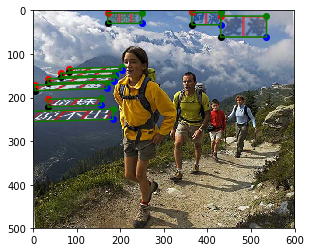

degree -1.94578277938


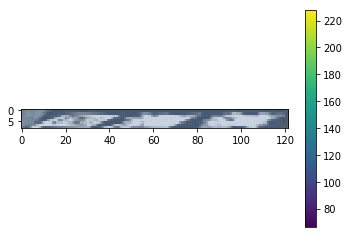

(9, 122, 3)
degree -1.90786419427


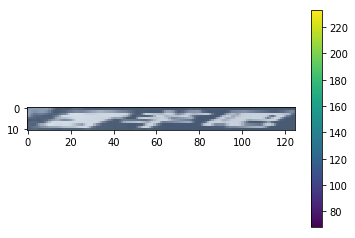

(11, 125, 3)
degree -1.86378483659


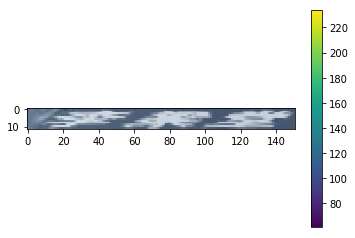

(12, 151, 3)
degree -1.76335102295


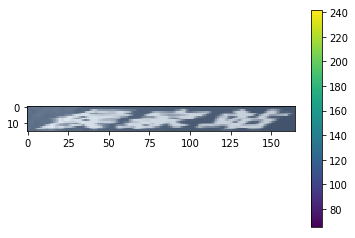

(15, 165, 3)
degree -0.00942084332158


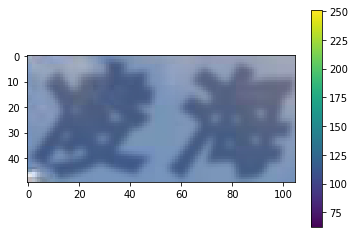

(50, 105, 3)
degree -0.00782529141697


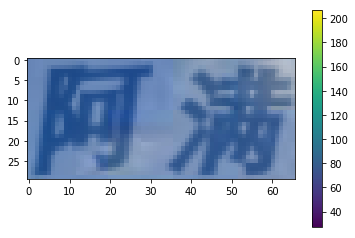

(30, 66, 3)
degree -0.00765146944687


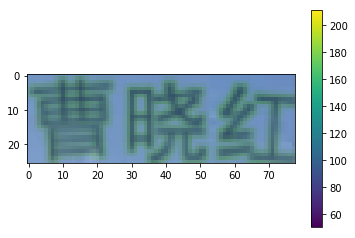

(26, 78, 3)
degree -1.68280890402


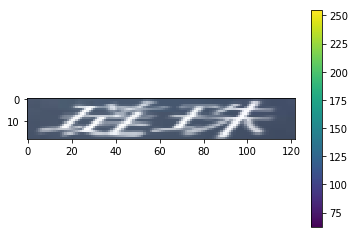

(19, 122, 3)
degree -1.5807567237


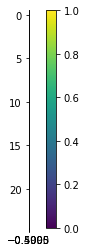

(25, 0, 3)
image name        :  hiking_125.jpg_0
  ** no. of chars :  24
  ** no. of words :  9
  ** text         :  [ u'\u56de\u6f9c\u9547\n\u96ea\u828a\u5427\n\u674e\u6881\u5802\n\u4faf\u5bb6\u7ad9'
 u'\u51cc\u6d77' u'\u963f\u6ee1' u'\u66f9\u6653\u7ea2'
 u'\u740f\u73e0 \n\u8bf4\u4e0d\u51fa']
(500, 600, 3)
[ u'\u56de\u6f9c\u9547\n\u96ea\u828a\u5427\n\u674e\u6881\u5802\n\u4faf\u5bb6\u7ad9'
 u'\u51cc\u6d77' u'\u963f\u6ee1' u'\u66f9\u6653\u7ea2'
 u'\u740f\u73e0 \n\u8bf4\u4e0d\u51fa']
next? ('q' to exit) : y


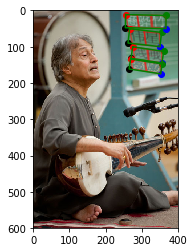

degree 6.20554154048


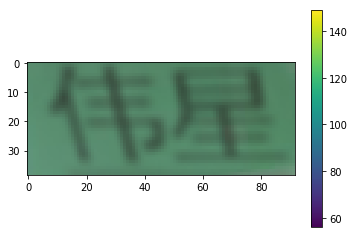

(39, 92, 3)
degree 8.04945064941


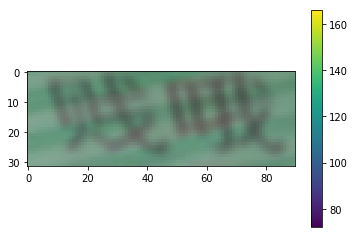

(32, 90, 3)
degree 1.22264307117


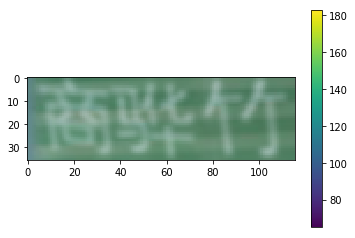

(36, 116, 3)
degree 8.3157466145


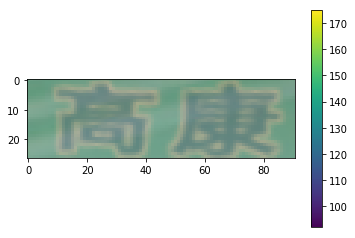

(27, 91, 3)
image name        :  indian+musicians_116.jpg_0
  ** no. of chars :  9
  ** no. of words :  4
  ** text         :  [u'\u4f1f\u661f\n\u8d31\u54e6' u'\u5546\u9a85\u7af9' u'\u9ad8\u5eb7']
(600, 400, 3)
[u'\u4f1f\u661f\n\u8d31\u54e6' u'\u5546\u9a85\u7af9' u'\u9ad8\u5eb7']
next? ('q' to exit) : q


In [11]:
# Author: Ankush Gupta
# Date: 2015
#coding=utf-8
"""
Visualize the generated localization synthetic
data stored in h5 data-bases
"""
from __future__ import division
import os
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt 
import h5py 
from common import *
import cv2



def viz_textbb(text_im, charBB_list, wordBB, alpha=1.0):
    """
    text_im : image containing text
    charBB_list : list of 2x4xn_i bounding-box matrices
    wordBB : 2x4xm matrix of word coordinates
    """
    plt.close(1)
    plt.figure(1)
    plt.imshow(text_im)
    plt.hold(True)
    H,W = text_im.shape[:2]

    # plot the character-BB:
    for i in xrange(len(charBB_list)):
        bbs = charBB_list[i]
        ni = bbs.shape[-1]
        for j in xrange(ni):
            bb = bbs[:,:,j]
            bb = np.c_[bb,bb[:,0]]
            plt.plot(bb[0,:], bb[1,:], 'r', alpha=alpha/2)

    # plot the word-BB:
    for i in xrange(wordBB.shape[-1]):
        bb = wordBB[:,:,i]
        bb = np.c_[bb,bb[:,0]]
#         print 'points 1', bb[0,:]
#         print 'points 2', bb[1,:]
#         print '----------------------'
        plt.plot(bb[0,:], bb[1,:], 'g', alpha=alpha)
        # visualize the indiv vertices:
        vcol = ['r','g','b','k']
        for j in xrange(4):
            plt.scatter(bb[0,j],bb[1,j],color=vcol[j])        

    plt.gca().set_xlim([0,W-1])
    plt.gca().set_ylim([H-1,0])
    plt.show(block=False)

def main(db_fname):
    db = h5py.File(db_fname, 'r')
    dsets = sorted(db['data'].keys())
    print "total number of images : ", colorize(Color.RED, len(dsets), highlight=True)
    for k in dsets:
        rgb = db['data'][k][...]
        charBB = db['data'][k].attrs['charBB']
        wordBB = db['data'][k].attrs['wordBB']
        txt = db['data'][k].attrs['txt']
#         print wordBB
        
        viz_textbb(rgb, [charBB], wordBB)
        
        test_part(rgb,wordBB)
        print "image name        : ", colorize(Color.RED, k, bold=True)
        print "  ** no. of chars : ", colorize(Color.YELLOW, charBB.shape[-1])
        print "  ** no. of words : ", colorize(Color.YELLOW, wordBB.shape[-1])
        print "  ** text         : ", colorize(Color.GREEN, txt)
        print rgb.shape
        cv2.imwrite('save.jpg',rgb)
        print txt
        
        if 'q' in raw_input("next? ('q' to exit) : "):
            break
    db.close()

if __name__=='__main__':
    main('results/SynthText_cartoon_viz.h5')

In [30]:
for word in [u'\u9f9a\u4f73\u901a' u'\u5085\u6c99\u4e3d' u'\u516b\u8def'
 u'\u77f3\u5c71']:
    print word

龚佳通傅沙丽八路石山


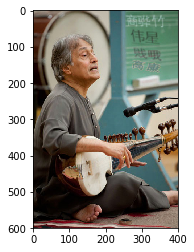

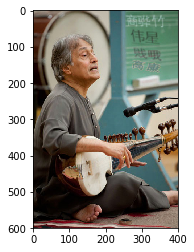

(<matplotlib.image.AxesImage at 0x7f01cc0a8910>, None)

In [39]:
import cv2 as cv
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
img=cv.imread('test_.jpg')
# plt.show(Image.fromarray(np.uint8(cv.cvtColor(img, cv.COLOR_BGR2RGB))))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.show()
#cv.imwrite('test_.jpg',cv.cvtColor(img, cv.COLOR_BGR2RGB))
rgb_img=Image.fromarray(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.imshow(rgb_img),plt.show()

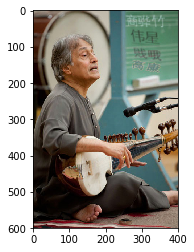

(<matplotlib.image.AxesImage at 0x7f01bc0f8ed0>, None)

In [43]:
img_=Image.open('test_.jpg')
plt.imshow(img_),plt.show()

In [4]:
word_tmp=[u'\u848b\u6210\u6797'
 u'\u8d77\u5e8a\n\u5c0f\u77f3\n\u6d2a\u8d56\u8857\n\u79c0\u624d\u5730'
 u'\u7d22\u70ed' u'\u798f\u8d21\u53bf\n\u4e1c\u7a3c\n\u6f5e\u5173\u6751']
len(word_tmp)

1

In [7]:
print u'\u798f\u8d21\u53bf\n\u4e1c\u7a3c\n\u6f5e\u5173\u6751'.split('\n')

[u'\u798f\u8d21\u53bf', u'\u4e1c\u7a3c', u'\u6f5e\u5173\u6751']


In [1]:
import os

In [2]:
%matplotlib inline

In [3]:
from PIL import Image

In [148]:
import random 
imgList = os.listdir('./data/general_imgs/')

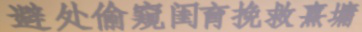

In [157]:
Image.open('./data/general_imgs/'+random.choice(imgList))